In [11]:
import cv2
import matplotlib.pyplot as plt

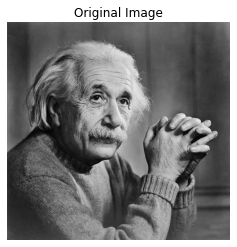

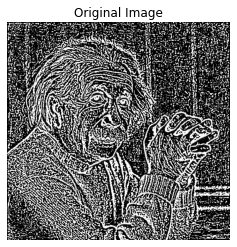

In [18]:
img = cv2.imread("einstein.jpg",0)
blur1 = cv2.GaussianBlur(img,(5,5),0)
blur2 = cv2.GaussianBlur(img,(9,9),2)
diff = blur1-blur2

plt.figure(),plt.axis("off"),plt.title("Original Image"),plt.imshow(img,cmap="gray")
plt.figure(),plt.axis("off"),plt.title("Original Image"),plt.imshow(diff,cmap="gray")
plt.show()

In [37]:
cap = cv2.VideoCapture("IGVC 2015 UNSW Advanced Course GoPro - Speed Record.mp4")

obj = cv2.imread("image2.png",1)
hsv = cv2.cvtColor(obj,cv2.COLOR_BGR2HSV)

while(True):
    ret,frame = cap.read()
    hsv_ = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
   
    objhist = cv2.calcHist([hsv],[0,1],None,[180,256],[0,180,0,256])
    cv2.normalize(objhist,objhist,0,255,cv2.NORM_MINMAX)
    dst = cv2.calcBackProject([hsv_],[0,1],objhist,[0,180,0,256],1)

    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    cv2.filter2D(dst, -1, disc, dst)

    ret,thresh = cv2.threshold(dst,50,255,0)
    thresh = cv2.merge((thresh,thresh,thresh))
    res = cv2.bitwise_and(frame,thresh) 
    
    
    cv2.imshow("Final",res)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()